# CNN - Example 02

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

## Load Keras Dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

(60000, 28, 28)
(28, 28)


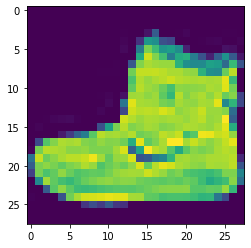

In [3]:
print(x_train.shape)
single_image = x_train[0]
print(single_image.shape)
plt.imshow(single_image)

### Display a list of images

In [4]:
# todo

### Pre-Process data

In [5]:
# The data is only 2D! convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [6]:
# Method 2: Reshape to include channel dimension (in this case, 1 channel)
# x_train = x_train.reshape(60000, 28, 28, 1)  
# x_test = x_test.reshape(10000,28,28,1)

### Normalize

x_train.shape: (60000, 28, 28, 1)


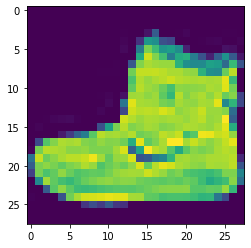

In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)
scaled_single = x_train[0]
plt.imshow(scaled_single)

### Number of multiple classes

In [8]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


## Model # 1

In [9]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)              

In [11]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5295 - accuracy: 0.8053 - val_loss: 0.4237 - val_accuracy: 0.8413
Epoch 2/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3759 - accuracy: 0.8583 - val_loss: 0.3652 - val_accuracy: 0.8635
Epoch 3/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3275 - accuracy: 0.8760 - val_loss: 0.3296 - val_accuracy: 0.8773
Epoch 4/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2967 - accuracy: 0.8873 - val_loss: 0.3023 - val_accuracy: 0.8868
Epoch 5/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2647 - accuracy: 0.8986 - val_loss: 0.2925 - val_accuracy: 0.8907
Epoch 6/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2455 - accuracy: 0.9063 - val_loss: 0.3127 - val_accuracy: 0.8820
Epoch 7/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2246 - accuracy: 0.9144 - val_loss: 0.3038 -

#### Evaluate

In [12]:
# Rule of thumb
# 1. High Bias                        accuracy = 80% val-accuracy = 78%   (2%  gap)
# 2. High Variance                    accuracy = 98% val-accuracy = 80%   (18% gap)
# 3. High Bias and High Variance      accuracy = 80% val-accuracy = 60%   (20% gap)
# 4. Low Bias and Low Variance        accuracy = 98% val-accuracy = 96%   (2%  gap)

##### Eval - Train

In [13]:
model.metrics_names

['loss', 'accuracy']

In [14]:
pd.DataFrame(model.history.history).head()

,loss,accuracy,val_loss,val_accuracy
0,0.529495,0.805333,0.423659,0.8413
1,0.375863,0.858317,0.365184,0.8635
2,0.327536,0.875967,0.329642,0.8773
3,0.296688,0.887317,0.302288,0.8868
4,0.264697,0.898567,0.292500,0.8907


In [19]:
pd.DataFrame(model.history.history).tail(1)

,loss,accuracy,val_loss,val_accuracy
14,0.133641,0.948783,0.348432,0.8995


<AxesSubplot:>

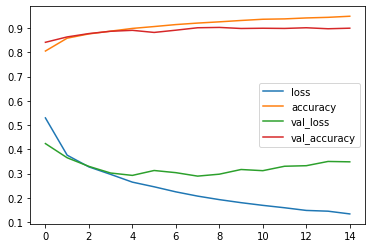

In [15]:
pd.DataFrame(model.history.history).plot()

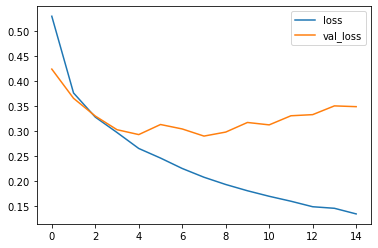

In [16]:
# Plot loss per iteration
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

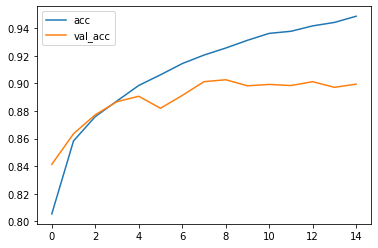

In [17]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

##### Eval - Test

In [20]:
test_metrics = model.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.3484 - accuracy: 0.8995


In [21]:
print('Loss on test dataset:', test_metrics[0])
print('Accuracy on test dataset:', test_metrics[1])

Loss on test dataset: 0.3484318256378174
Accuracy on test dataset: 0.8995000123977661


In [22]:
print("Loss and Accuracy on Train dataset:")

Loss and Accuracy on Train dataset:


In [23]:
pd.DataFrame(history.history).tail(1)

,loss,accuracy,val_loss,val_accuracy
14,0.133641,0.948783,0.348432,0.8995


#### Predictions

In [24]:
y_prediction = np.argmax(model.predict(x_test), axis=-1)

#### Reports

In [25]:
# Plot confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.82      0.83      1000
           3       0.93      0.89      0.91      1000
           4       0.82      0.84      0.83      1000
           5       0.98      0.97      0.98      1000
           6       0.70      0.73      0.71      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

[[864   0  20   8   4   1  95   0   8   0]
 [  6 977   0   8   3   0   4   0   2   0]
 [ 21   1 821   6  68   0  82   0   1   0]
 [ 15   5  26 893  27   0  31   0   3   0]
 [  0   0  40  28 844   0  87   0   1   0]
 [  1   0   2   1   0 966 

<AxesSubplot:>

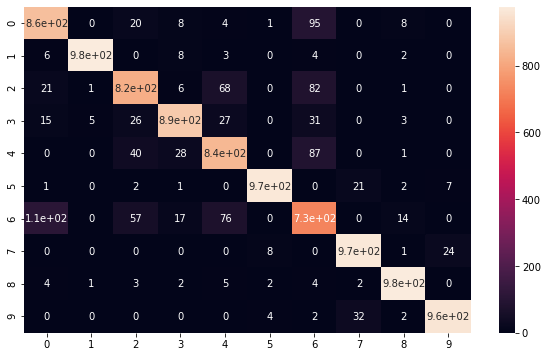

In [26]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_prediction),annot=True)

In [27]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

#### Predictions go wrong!

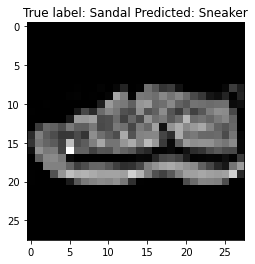

In [28]:
# Show some misclassified examples
misclassified_idx = np.where(y_prediction != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), x_train[0])
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_prediction[i]]));

#### Upload file(s) to test the model

#### Conclusion : Final thoughts

In [29]:
# Rule of thumb
# 1. High Bias                        accuracy = 80% val-accuracy = 78%   (2%  gap)
# 2. High Variance                    accuracy = 98% val-accuracy = 80%   (18% gap)
# 3. High Bias and High Variance      accuracy = 80% val-accuracy = 60%   (20% gap)
# 4. Low Bias and Low Variance        accuracy = 98% val-accuracy = 96%   (2%  gap)

In [30]:
print("Percentage of wrong predcitions : " + str(len(misclassified_idx)/len(y_prediction)*100) + " %")

Percentage of wrong predcitions : 10.05 %


In [31]:
print("Models maximum accuracy            : " + str(np.max(history.history['accuracy'])*100) + " %")
print("Models maximum validation accuracy : " + str(np.max(history.history['val_accuracy'])*100) + " %")

Models maximum accuracy            : 94.87833380699158 %
Models maximum validation accuracy : 90.27000069618225 %


In [ ]:
# Model has Low Bias and Low Variance with 5% gap. It can be improved further to 99%